<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/deep_learning_framewrok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ディープラーニングフレームワーク２

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 【問題3】Iris（2値分類）をKerasで学習

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

x = pd.DataFrame(data = data.data[:100,], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

y = pd.DataFrame(data = data.target[:100,], columns=['spacies'])

# NumPy 配列に変換
X = np.array(x)
y = np.array(y)

from sklearn.model_selection import train_test_split
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
# ハイパーパラメタの設定
batch_size = 10
epochs = 15
inputs= Input(shape=(4,))

# モデルの定義
x = Dense(128, activation='relu', input_shape = (X_train.shape[1],))(inputs)
x = Dense(64, activation='relu', input_shape = (128,))(x)
x = Dense(32, activation='relu', input_shape = (64,))(x)
predictions = Dense(1, activation='sigmoid', input_shape = (32,))(x)

# モデルの呼び出し
model = Model(inputs=inputs, outputs=predictions) 

# モデルのコンパイル
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'] )

# 学習および検証
model.fit(X_train, y_train, epochs=30, batch_size=30, validation_data = (X_val, y_val))

Epoch 1/30
3/3 [==============================] - 1s 211ms/step - loss: 0.6799 - accuracy: 0.5115 - val_loss: 0.6486 - val_accuracy: 0.3750
Epoch 2/30
3/3 [==============================] - 0s 25ms/step - loss: 0.5646 - accuracy: 0.5531 - val_loss: 0.5555 - val_accuracy: 1.0000
Epoch 3/30
3/3 [==============================] - 0s 26ms/step - loss: 0.5171 - accuracy: 1.0000 - val_loss: 0.4961 - val_accuracy: 1.0000
Epoch 4/30
3/3 [==============================] - 0s 24ms/step - loss: 0.4867 - accuracy: 1.0000 - val_loss: 0.4485 - val_accuracy: 1.0000
Epoch 5/30
3/3 [==============================] - 0s 24ms/step - loss: 0.4421 - accuracy: 1.0000 - val_loss: 0.4088 - val_accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 0s 25ms/step - loss: 0.4020 - accuracy: 1.0000 - val_loss: 0.3752 - val_accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 0s 24ms/step - loss: 0.3678 - accuracy: 1.0000 - val_loss: 0.3467 - val_accuracy: 1.0000
Epoch 8/30
3/3 [==========

## 【問題4】Iris（多値分類）をKerasで学習

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
data = load_iris()

x = pd.DataFrame(data = data.data[:150,], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(data = data.target[:150,], columns=['spacies'])

# NumPy 配列に変換
X = np.array(x)
y = np.array(y)
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y = enc.fit_transform(y)

from sklearn.model_selection import train_test_split
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
y_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [ ]:
# ハイパーパラメタの設定
batch_size = 10
epochs = 15
inputs= Input(shape=(4,))

# モデルの定義
x = Dense(128, activation='relu', input_shape = (X_train.shape[1],))(inputs)
x = Dense(64, activation='relu', input_shape = (128,))(x)
x = Dense(32, activation='relu', input_shape = (64,))(x)
predictions = Dense(3, activation='softmax', input_shape = (32,))(x) # 多項目分類のため、活性化関数はsoftmaxを選択

# モデルの呼び出し
model = Model(inputs=inputs, outputs=predictions) 

# モデルのコンパイル
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'] )

# 学習および検証
model.fit(X_train, y_train, epochs=30, batch_size=30, validation_data = (X_val, y_val))

Epoch 1/30
4/4 [==============================] - 1s 135ms/step - loss: 1.2492 - accuracy: 0.3394 - val_loss: 1.0470 - val_accuracy: 0.3333
Epoch 2/30
4/4 [==============================] - 0s 22ms/step - loss: 1.0563 - accuracy: 0.1925 - val_loss: 0.9694 - val_accuracy: 0.5000
Epoch 3/30
4/4 [==============================] - 0s 21ms/step - loss: 0.9844 - accuracy: 0.3942 - val_loss: 0.8903 - val_accuracy: 0.7083
Epoch 4/30
4/4 [==============================] - 0s 19ms/step - loss: 0.9045 - accuracy: 0.6664 - val_loss: 0.8300 - val_accuracy: 0.7083
Epoch 5/30
4/4 [==============================] - 0s 18ms/step - loss: 0.8243 - accuracy: 0.6972 - val_loss: 0.7738 - val_accuracy: 0.7083
Epoch 6/30
4/4 [==============================] - 0s 17ms/step - loss: 0.7816 - accuracy: 0.6794 - val_loss: 0.7251 - val_accuracy: 0.7083
Epoch 7/30
4/4 [==============================] - 0s 17ms/step - loss: 0.7235 - accuracy: 0.7006 - val_loss: 0.6757 - val_accuracy: 0.7083
Epoch 8/30
4/4 [==========

## 【問題5】House PricesをKerasで学習

In [ ]:
import pandas as pd

DATA_DIR='C:/Users/es/Documents/Python Scripts/1.Jan/Week4/'
data = pd.read_csv(f'{DATA_DIR}train.csv')

X = data.loc[:,['GrLivArea','YearBuilt']]
y = data.loc[:,['SalePrice']]

In [ ]:
X.isnull().sum()

GrLivArea    0
YearBuilt    0
dtype: int64

In [ ]:
y.isnull().sum()

SalePrice    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, X_test)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
# ハイパーパラメタの設定
batch_size = 10
epochs = 15
inputs= Input(shape=(2,))

# モデルの定義
x = Dense(128, activation='relu', input_shape = (X_train_std.shape[1],))(inputs)
x = Dense(64, activation='relu', input_shape = (128,))(x)
x = Dense(32, activation='relu', input_shape = (64,))(x)
predictions = Dense(1, activation='relu', input_shape = (32,))(x) # 多項目分類のため、活性化関数はsoftmaxを選択

# モデルの呼び出し
model = Model(inputs=inputs, outputs=predictions) 

# モデルのコンパイル
model.compile(optimizer='Adam',
              loss='mean_squared_error'
             )

# 学習および検証
model.fit(X_train_std, y_train, epochs=30, batch_size=30, validation_data = (X_test_std, y_test))

Epoch 1/30
37/37 [==============================] - 1s 7ms/step - loss: 39551446501.0526 - val_loss: 40217100288.0000
Epoch 2/30
37/37 [==============================] - 0s 3ms/step - loss: 37526877237.8947 - val_loss: 40207708160.0000
Epoch 3/30
37/37 [==============================] - 0s 3ms/step - loss: 39027540506.9474 - val_loss: 40164995072.0000
Epoch 4/30
37/37 [==============================] - 0s 3ms/step - loss: 36820852035.3684 - val_loss: 40029413376.0000
Epoch 5/30
37/37 [==============================] - 0s 3ms/step - loss: 36834788190.3158 - val_loss: 39699726336.0000
Epoch 6/30
37/37 [==============================] - 0s 3ms/step - loss: 38442373982.3158 - val_loss: 39028072448.0000
Epoch 7/30
37/37 [==============================] - 0s 2ms/step - loss: 37905823258.9474 - val_loss: 37849255936.0000
Epoch 8/30
37/37 [==============================] - 0s 2ms/step - loss: 36114511009.6842 - val_loss: 35985412096.0000
Epoch 9/30
37/37 [==============================] - 0s 2

## 【問題6】MNISTをKerasで学習

In [ ]:
# データセットをダウンロードするコード
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# データセットの確認
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(y_train.shape) # (60000,)
print(y_test.shape) # (10000,)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


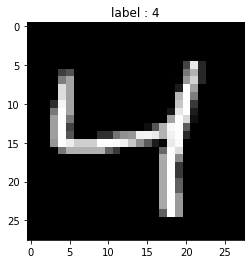

In [ ]:
# 画像データの可視化
import matplotlib.pyplot as plt
%matplotlib inline
index = 2
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [ ]:
# 前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [ ]:
y_train_one_hot = (y_train.reshape(-1,1) == np.arange(10)).astype(np.float64)
y_test_one_hot = (y_test.reshape(-1,1) == np.arange(10)).astype(np.float64)
print(y_train.shape)
print(y_train_one_hot.shape)
print(y_train_one_hot.dtype)

(60000,)
(60000, 10)
float64


In [ ]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
def split_data(X, permutation, val_size_rate=0.2):
    X = X[permutation]
    val_size = int(len(X) * val_size_rate)
    val = X[:val_size]
    train = X[val_size:]
    return train, val

permutation = np.random.permutation(np.arange(len(X_train)))
X_train, X_val = split_data(X_train, permutation)
X_train = X_train[:, :, :, np.newaxis]
X_val = X_val[:, :, :, np.newaxis]
y_train, y_val = split_data(y_train_one_hot, permutation)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(48000, 28, 28, 1)
(48000, 10)
(12000, 28, 28, 1)
(12000, 10)


In [ ]:
# ハイパーパラメタの設定
num_classes = 10
batch_size = 10
epochs = 15
bn_model = 0
p_activation = 'relu'
input_1 = Input(shape=(28, 28, 1))

# モデルの定義
img_1 = Conv2D(32, kernel_size=(3, 3), activation=p_activation)(input_1)
img_1 = Conv2D(64, kernel_size=(3, 3), activation=p_activation)(img_1)
img_1 = MaxPooling2D((2, 2))(img_1)
img_1 = Dropout(0.25)(img_1)

img_1 = Conv2D(32, kernel_size=(3, 3), activation=p_activation)(img_1)
img_1 = Conv2D(32, kernel_size=(3, 3), activation=p_activation)(img_1)
img_1 = MaxPooling2D((2, 2))(img_1)
img_1 = Dropout(0.25)(img_1)

x = Flatten()(img_1)
x = Dense(128, activation='relu', input_shape = (32,))(x)
x = Dense(64, activation='relu', input_shape = (128,))(x)
x = Dense(32, activation='relu', input_shape = (64,))(x)
predictions = Dense(num_classes, activation='softmax', input_shape = (32,))(x) # 多項目分類のため、活性化関数はsoftmaxを選択

# モデルの呼び出し
model = Model(input_1, predictions) 

# モデルのコンパイル
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# 学習および検証
model.fit(X_train, y_train, epochs=30, validation_split=0.2, validation_data = (X_val, y_val))

Epoch 1/30
1200/1200 [==============================] - 94s 77ms/step - loss: 0.5462 - accuracy: 0.8191 - val_loss: 0.0677 - val_accuracy: 0.9798
Epoch 2/30
1200/1200 [==============================] - 82s 68ms/step - loss: 0.0789 - accuracy: 0.9752 - val_loss: 0.0662 - val_accuracy: 0.9775
Epoch 3/30
1200/1200 [==============================] - 76s 64ms/step - loss: 0.0577 - accuracy: 0.9819 - val_loss: 0.0367 - val_accuracy: 0.9882
Epoch 4/30
1200/1200 [==============================] - 78s 65ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.0327 - val_accuracy: 0.9900
Epoch 5/30
1200/1200 [==============================] - 79s 66ms/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0353 - val_accuracy: 0.9880
Epoch 6/30
1200/1200 [==============================] - 79s 66ms/step - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.0316 - val_accuracy: 0.9893
Epoch 7/30
1200/1200 [==============================] - 79s 66ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0294 -